# 미적분

미분, 적분, 극한, 급수 전개 같은 기본적인 미분적분을 심파이에서 계산하는 방법을 다룬다.
미적분 수학에 친숙하지 않다면, 그냥 넘어가도 좋다.

In [1]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

## 미분

미분을 할 때는 `diff` 함수를 사용한다.

In [2]:
diff(cos(x), x)

In [3]:
diff(exp(x**2), x)

`diff` 함수는 한번에 미분을 여러번 수행할 수 있다.
미분을 여러번 수행하려면, 변수를 미분취하고자 하는 만큼 전달하거나,
변수 뒤에 숫자를 넘겨 전달한다.
예를 들어, 다음 두가지 모두 $x^4$에 대해 3번 미분한다.

In [4]:
diff(x**4, x, x, x)

In [5]:
diff(x**4, x, 3)

한번에 다수 변수에 대해 미분을 취할 수도 있다.
단일 변수 미분과 동일한 구분을 사용해서 각 미분을 순서대로 전달한다.
예를 들어, 다음 각각은 $\frac{\partial^7}{\partial x\partial y^2\partial z^4} e^{x y z}$ 미분을 계산한다.

In [6]:
expr = exp(x*y*z)
diff(expr, x,y,y,z,z,z,z)

In [7]:
diff(expr, x, y, 2, z, 4)

In [8]:
diff(expr, x, y, y, z, 4)

`diff`를 메쏘드로 호출할 수도 있다.
`diff`를 호출하는 두가지 방식은 정확히 동일하고, 편리함을 목적으로 제공된다.

In [9]:
expr.diff(x, y, y, z, 4)

값을 매기지 않은 미분을 생성하려면, `Derivatives` 클래스를 사용한다.
`diff`와 동일한 구문을 갖는다.

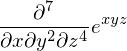

In [11]:
deriv = Derivative(expr, x, y, y, z, 4)
deriv

아직 값을 매기지 않은 미분에 값을 매기려면, `doit` 메쏘드를 사용한다.

In [12]:
deriv.doit()

이런 값을 매기지 않은 객체는 미분에 대한 값을 매기는 것을 지연시키거나 출판 목적으로 유용하다.
심파이가 표현식 미분을 어떻게 계산하는지 모를 때도 사용될 수 있다.(예를 들어, 정의되지 않는 함수를 포함하고 있는 경우, [Solving Differential Equations](http://docs.sympy.org/latest/tutorial/solvers.html#tutorial-dsolve)에 기술되어 있다)

## 적분

적분을 계산하는데 `integrate` 함수를 사용한다.
두가지 유형의 적분이 존재한다: 부정적분과 정적분.
부정적분, 즉 역도함수, 원시함수를 계산하려면, 표현식 다음에 변수를 전달만하면 된다.

In [13]:
integrate(cos(x), x)

심파이가 적분 상수를 포함하지 않음에 주목한다.
포함시키려면, 본인 스스로 포함을 시키거나 미분방정식으로 문제를 다시 바꾸어 표현해서 `dsolve` 함수로 푸는데, 이 경우에 상수가 추가되어 있다. [Solving Differential Equations](http://docs.sympy.org/latest/tutorial/solvers.html#tutorial-dsolve)을 참고한다.

> 빠른 도움말
> 심파이에서 $\infty$ 는 `oo`(영문 소문자 `o` 두번) 로 표기된다. `oo`가 $\infty$ 처럼 보이고, 타이핑하기 쉽기 때문이다.

정적분을 계산하려면, 인자를 `(integration_variable, lower_limit, upper_limit)` 순서로 넘긴다.
예를 들어, 다음을 계산하는데,

$\int_0^\infty e^{-x}\,dx$

다음과 같이 작성한다.

In [14]:
integrate(exp(-x), (x, 0, oo))

부정적분과 마찬가지로, 극한 튜플을 다수 넘겨서 다중적분을 계산할 수도 있다.
예를 들어,

$ \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} e^{- x^{2} - y^{2}}\, dx\, dy,$

다음과 같이 계산한다.

In [15]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

`integrate` 함수가 적분을 계산할 수 없는 경우, 값 매김할 수 없는 `integral` 객체를 반환한다.

In [16]:
expr = integrate(x**x, x)
print(expr)

Integral(x**x, x)


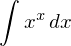

In [17]:
expr

`Derivative` 와 마찬가지로, `Integral`을 사용해서 값 매김할 수 없는 적분을 생성할 수 있다.
나중에 해당 적분에 값 매김을 하려면, `doit`을 호출한다.

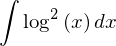

In [18]:
expr = Integral(log(x)**2, x)
expr

In [19]:
expr.doit()

`integrate` 함수는 정적분과 부정적분을 항상 계산하는데 이바지하는 강력한 알고리즘을 사용한다.
휴리스틱 패턴 매칭 알고리즘, [Risch algorithm](http://en.wikipedia.org/wiki/Risch_algorithm) 부분 구현, 특수 함수, 특히 정적분에 대한 적분을 계산하는데 유용한 [Meijer G-functions](http://en.wikipedia.org/wiki/Meijer_g-function)를 이용한 알고리즘이 포함된다. `integrate` 함수의 강력함을 보여주는 사례가 다음에 나와 있다.

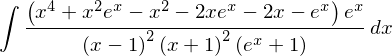

In [21]:
integ = Integral((x**4 + x**2*exp(x) - x**2 - 2*x*exp(x) - 2*x - 
                  exp(x))*exp(x)/((x - 1)**2*(x + 1)**2*(exp(x) + 1)), x)
integ

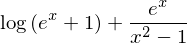

In [22]:
integ.doit()

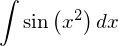

In [24]:
integ = Integral(sin(x**2), x)
integ

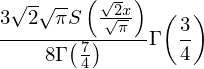

In [25]:
integ.doit()

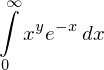

In [28]:
integ = Integral(x**y*exp(-x), (x, 0, oo))
integ

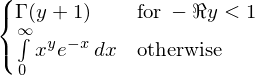

In [29]:
integ.doit()

마지막 예제는 `Piecewise` 표현식을 반환한다. 왜냐하면, $\Re(y) > 1$이 아닌 경우 적분이 수렴하지 않기 때문이다.

## 극한

심파이는 `limit` 함수로 기호극한을 계산할 수 있다. 

$\lim_{x\to x_0} f(x)$

계산하는 구문은 `limit(f(x), x, x0)`와 같이 적는다.

In [30]:
limit(sin(x)/x, x, 0)

값매김 점이 특이점인 경우, `subs` 대신에 `limit`을 사용한다.
심파이가 $\infty$를 표현하는 객체가 있지만, 값매김에 무한을 사용하게 되면 신뢰성에 문제가 생길 수 있다.
이유는 증가율 같은 것을 추적하지 못하기 때문이다. 또한, $\infty - \infty$ 와 
$\frac{\infty}{\infty}$ 경우 $\mathrm{nan}$ (not-a-number, 숫자 아님)을 반환한다. 예를 들어, 

In [31]:
expr = x**2 / exp(x)
expr.subs(x, oo)

In [32]:
limit(expr, x, oo)

`Derivative`와 `Integral`과 마찬가지로, `limit`는 값매김하지 않는 대응되는 클래스가 있는데, `Limit`이다. 값매김을 수행하려면, `doit`을 사용한다.

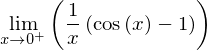

In [33]:
expr = Limit((cos(x) - 1)/x, x, 0)
expr

In [34]:
expr.doit()

한쪽에서 접근하는 극한에 값을 매기려면, `+` 혹은 `-` 부호를 넘겨준다. 예를 들어,

$\lim_{x\to 0^+}\frac{1}{x},$

다음과 같이 작성해서 계산한다.

In [35]:
limit(1/x, x, 0, '+')

반면에, 

In [36]:
limit(1/x, x, 0, '-')

## 수열 전개

심파이로 특정 점 주변에 함수에 대해 점근적 수열 전개를 해서 계산할 수 있다.
$x = x_0$ 점 주변에 $x^n$차항으로 $f(x)$ 전개해서 계산하려면, `f(x).series(x, x0, n)`을 사용한다.
`x0`와 `n`은 생략될 수 있는데, 생략한 경우, 기본디폴트값으로 `x0=0`, `n=6` 값이 사용된다.

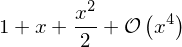

In [37]:
expr = exp(sin(x))
expr.series(x, 0, 4)